In [1]:
# Importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import timedelta

In [2]:
# To remove some warnings (setting with a copy)
pd.options.mode.chained_assignment = None

In [3]:
# Loading dataset
df = pd.read_csv('static/customer_segmentation.csv', encoding='latin1')

# Data Exploration 

Let's see what is going on in our dataset.

In [4]:
print(df.shape)
df.head()

(541909, 8)


InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [5]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

We can see that we have negative "Quantity" and "UnitPrice". It's probably returned orders or discounts.

In [6]:
# Let's check the type of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Let's see where our orders are from
pd.DataFrame([df['Country'].value_counts(), df['Country'].value_counts(normalize=True)]).T

count  proportion
Country                                   
United Kingdom        495478.0    0.914320
Germany                 9495.0    0.017521
France                  8557.0    0.015790
EIRE                    8196.0    0.015124
Spain                   2533.0    0.004674
Netherlands             2371.0    0.004375
Belgium                 2069.0    0.003818
Switzerland             2002.0    0.003694
Portugal                1519.0    0.002803
Australia               1259.0    0.002323
Norway                  1086.0    0.002004
Italy                    803.0    0.001482
Channel Islands          758.0    0.001399
Finland                  695.0    0.001283
Cyprus                   622.0    0.001148
Sweden                   462.0    0.000853
Unspecified              446.0    0.000823
Austria                  401.0    0.000740
Denmark                  389.0    0.000718
Japan                    358.0    0.000661
Poland                   341.0    0.000629
Israel                   297.0    0.000548
USA                      291.0    0.000537
Hong Kong                288.0    0.000531
Singapore                229.0    0.000423
Iceland                  182.0    0.000336
Canada                   151.0    0.000279
Greece                   146.0    0.000269
Malta                    127.0    0.000234
United Arab Emirates      68.0    0.000125
European Community        61.0    0.000113
RSA                       58.0    0.000107
Lebanon                   45.0    0.000083
Lithuania                 35.0    0.000065
Brazil                    32.0    0.000059
Czech Republic            30.0    0.000055
Bahrain                   19.0    0.000035
Saudi Arabia              10.0    0.000018

Considering the fact that 91% of our orders are coming from the United Kingdom, we will focus on this country.

In [8]:
data_uk= df.loc[df['Country'] == 'United Kingdom']
data_uk = data_uk.drop('Country', axis=1)
data_uk.shape

(495478, 7)

Now, do we have any missing values?

In [9]:
data_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
dtype: int64

In [10]:
# How many products do we sell and how much did we sell in our timeframe
pd.DataFrame([data_uk['Description'].value_counts(), data_uk['Description'].value_counts(normalize=True)]).T

count  proportion
Description                                            
WHITE HANGING HEART T-LIGHT HOLDER   2271.0    0.004597
JUMBO BAG RED RETROSPOT              2001.0    0.004050
REGENCY CAKESTAND 3 TIER             1859.0    0.003763
PARTY BUNTING                        1634.0    0.003308
LUNCH BAG RED RETROSPOT              1460.0    0.002955
...                                     ...         ...
MIA                                     1.0    0.000002
PINK CRYSTAL GUITAR PHONE CHARM         1.0    0.000002
showroom                                1.0    0.000002
TRAVEL CARD WALLET DOTCOMGIFTSHOP       1.0    0.000002
ORANGE PENDANT TRIPLE SHELL NECKLAC     1.0    0.000002

[4202 rows x 2 columns]

In [11]:
# Does some customers ordered a lot?
pd.DataFrame([data_uk['CustomerID'].value_counts(), data_uk['CustomerID'].value_counts(normalize=True)]).T

count  proportion
CustomerID                    
17841.0     7983.0    0.022060
14096.0     5128.0    0.014171
12748.0     4642.0    0.012828
14606.0     2782.0    0.007688
15311.0     2491.0    0.006884
...            ...         ...
15668.0        1.0    0.000003
15657.0        1.0    0.000003
13307.0        1.0    0.000003
16138.0        1.0    0.000003
16765.0        1.0    0.000003

[3950 rows x 2 columns]

In [12]:
# We remove the missing values
data_uk = data_uk.dropna()
data_uk.shape

(361878, 7)

In [13]:
# Add a Total sales column 
data_uk['TotalAmount']= data_uk['Quantity'] * data_uk['UnitPrice']
data_uk.head()

InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID  TotalAmount  
0  12/1/2010 8:26       2.55     17850.0        15.30  
1  12/1/2010 8:26       3.39     17850.0        20.34  
2  12/1/2010 8:26       2.75     17850.0        22.00  
3  12/1/2010 8:26       3.39     17850.0        20.34  
4  12/1/2010 8:26       3.39     17850.0        20.34

In [14]:
data_uk.describe()

Quantity      UnitPrice     CustomerID    TotalAmount
count  361878.000000  361878.000000  361878.000000  361878.000000
mean       11.077029       3.256007   15547.871368      18.702086
std       263.129266      70.654731    1594.402590     451.918484
min    -80995.000000       0.000000   12346.000000 -168469.600000
25%         2.000000       1.250000   14194.000000       3.750000
50%         4.000000       1.950000   15514.000000      10.200000
75%        12.000000       3.750000   16931.000000      17.700000
max     80995.000000   38970.000000   18287.000000  168469.600000

As expected, we have negative "TotalAmount", we have to remove them.

In [15]:
data_uk[data_uk['TotalAmount'] <= 0].sort_values('TotalAmount')

InvoiceNo StockCode                     Description  Quantity   
540422   C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995  \
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
222681   C556445         M                          Manual        -1   
173277   C551685      POST                         POSTAGE        -1   
173391   C551699         M                          Manual        -1   
...          ...       ...                             ...       ...   
485985    577696         M                          Manual         1   
358655    568158      PADS      PADS TO MATCH ALL CUSHIONS         1   
279324    561284     22167      OVAL WALL MIRROR DIAMANTE          1   
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
446794    574920     23480  MINI LIGHTS WOODLAND MUSHROOMS         1   

             InvoiceDate  UnitPrice  CustomerID  TotalAmount  
540422    12/9/2011 9:27       2.08     16446.0   -168469.60  
61624    1/18/2011 10:17       1.04     12346.0    -77183.60  
222681   6/10/2011 15:31   38970.00     15098.0    -38970.00  
173277    5/3/2011 12:51    8142.75     16029.0     -8142.75  
173391    5/3/2011 14:12    6930.00     16029.0     -6930.00  
...                  ...        ...         ...          ...  
485985  11/21/2011 11:57       0.00     16406.0         0.00  
358655   9/25/2011 12:22       0.00     16133.0         0.00  
279324   7/26/2011 12:24       0.00     16818.0         0.00  
502122  11/25/2011 15:57       0.00     13256.0         0.00  
446794   11/7/2011 16:34       0.00     13985.0         0.00  

[7557 rows x 8 columns]

In [16]:
total_amounts = data_uk.groupby('CustomerID').agg(TotalAmount=('TotalAmount', 'sum'))
customers_to_drop = total_amounts[total_amounts['TotalAmount'] <= 0.01].index
customers_to_drop

Index([12346.0, 12870.0, 12943.0, 13154.0, 13256.0, 13364.0, 13672.0, 13693.0,
       13762.0, 13829.0, 13958.0, 14119.0, 14213.0, 14437.0, 14557.0, 14627.0,
       14679.0, 14777.0, 14792.0, 15369.0, 15590.0, 15638.0, 15728.0, 15802.0,
       15823.0, 16061.0, 16138.0, 16252.0, 16262.0, 16428.0, 16454.0, 16546.0,
       16579.0, 16742.0, 16878.0, 16995.0, 17065.0, 17307.0, 17448.0, 17547.0,
       17548.0, 17603.0, 17820.0, 18072.0, 18141.0, 18256.0, 18268.0, 18274.0],
      dtype='float64', name='CustomerID')

In [17]:
# Now we can remove those customers
data_uk_vf = data_uk[~data_uk['CustomerID'].isin(customers_to_drop)]
data_uk_vf.head()

InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID  TotalAmount  
0  12/1/2010 8:26       2.55     17850.0        15.30  
1  12/1/2010 8:26       3.39     17850.0        20.34  
2  12/1/2010 8:26       2.75     17850.0        22.00  
3  12/1/2010 8:26       3.39     17850.0        20.34  
4  12/1/2010 8:26       3.39     17850.0        20.34

In [18]:
# Datasets number of customers checking 
print(data_uk['CustomerID'].nunique())
print(len(customers_to_drop))
print(data_uk_vf['CustomerID'].nunique())

3950
48
3902


Now, we need to remove the cancelled orders.

In [19]:
data_uk_vf.describe()

Quantity    UnitPrice     CustomerID    TotalAmount
count  361546.000000  361546.0000  361546.000000  361546.000000
mean       11.057061       3.2294   15547.492527      18.752073
std       195.951004      70.2418    1594.247389     413.998350
min    -80995.000000       0.0000   12747.000000 -168469.600000
25%         2.000000       1.2500   14194.000000       3.750000
50%         4.000000       1.9500   15514.000000      10.200000
75%        12.000000       3.7500   16931.000000      17.700000
max     80995.000000   38970.0000   18287.000000  168469.600000

In [20]:
data_uk_null = data_uk_vf[data_uk_vf['TotalAmount'] < 0]
data_uk_null['Quantity'] = - data_uk_null['Quantity']
data_uk_null['TotalAmount'] = - data_uk_null['TotalAmount']
data_uk_null = data_uk_null[['CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount']]

data_uk_not_null = data_uk_vf[data_uk_vf['TotalAmount'] >= 0]
data_uk_not_null['Quantity'] = - data_uk_not_null['Quantity']
data_uk_not_null['TotalAmount'] = - data_uk_not_null['TotalAmount']
data_uk_not_null = data_uk_not_null[['CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount']]

df_concat = pd.concat([data_uk_null, data_uk_not_null])
df_concat = df_concat.drop_duplicates()
df_concat.head()

CustomerID                      Description  Quantity  UnitPrice   
141      14527.0                         Discount         1      27.50  \
154      15311.0  SET OF 3 COLOURED  FLYING DUCKS         1       4.65   
939      17897.0         JAM MAKING SET WITH JARS         6       4.25   
1441     17841.0        HAND WARMER RED RETROSPOT         1       2.10   
1442     17841.0        CHARLOTTE BAG SUKI DESIGN         2       0.85   

      TotalAmount  
141         27.50  
154          4.65  
939         25.50  
1441         2.10  
1442         1.70

In [21]:
data_uk_concat = pd.concat([df_concat, data_uk_vf])
null_quantity = data_uk_concat[data_uk_concat['Quantity'] < 0]
data_uk_concat = data_uk_concat.drop(null_quantity.index)
data_uk_concat = data_uk_concat.drop_duplicates(subset=['CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount'])
data_uk_concat.describe()

CustomerID      Quantity    UnitPrice   TotalAmount
count  41968.000000  41968.000000  41968.00000  41968.000000
mean   15493.025734     11.682591      2.86506     20.442044
std     1622.462285     40.129325      3.46751     64.607734
min    12747.000000      1.000000      0.04000      0.120000
25%    14107.000000      2.000000      1.25000      3.900000
50%    15365.000000      4.000000      1.95000     10.200000
75%    16910.000000     12.000000      3.75000     17.700000
max    18287.000000   3114.000000    295.00000   6539.400000

In [22]:
# Sort dataset by total amount of sales 
column_to_sort = 'TotalAmount'
sorted_data_amount = data_uk_concat.sort_values(by=column_to_sort, ascending=False)
sorted_data_amount.head()

CustomerID                         Description  Quantity  UnitPrice   
160546     15749.0  FAIRY CAKE FLANNEL ASSORTED COLOUR      3114       2.10  \
84323      18102.0        VINTAGE UNION JACK MEMOBOARD       504       6.38   
87631      16029.0  GROW A FLYTRAP OR SUNFLOWER IN TIN      2400       0.94   
488799     16532.0                       CHILLI LIGHTS       480       4.65   
390557     16029.0                FELTCRAFT DOLL MOLLY       720       2.55   

        TotalAmount InvoiceNo StockCode       InvoiceDate  
160546      6539.40    550461     21108   4/18/2011 13:20  
84323       3215.52    543379     21623    2/7/2011 15:37  
87631       2256.00    543669     22693   2/11/2011 11:22  
488799      2232.00    577852     79321  11/22/2011 11:08  
390557      1836.00    570557     22273  10/11/2011 11:15

Let's see when the orders are placed.

In [23]:
# Converting Invoicedate to datetime
data_uk_concat["InvoiceDate"] = pd.to_datetime(data_uk_concat["InvoiceDate"], format='%m/%d/%Y %H:%M')
data_uk_concat["Month"] = data_uk_concat["InvoiceDate"].apply(lambda x: x.month)
data_uk_concat["Day"] = data_uk_concat["InvoiceDate"].apply(lambda x: x.day)
data_uk_concat["Year"] = data_uk_concat["InvoiceDate"].apply(lambda x: x.year)
data_uk_concat["Hour"] = data_uk_concat["InvoiceDate"].apply(lambda x: x.hour)
data_uk_concat.shape

(41968, 12)

In [24]:
data_uk_concat.head()

CustomerID                         Description  Quantity  UnitPrice   
47     17850.0           HAND WARMER RED POLKA DOT         6       1.85  \
48     17850.0              HAND WARMER UNION JACK         6       1.85   
49     17850.0  WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
50     17850.0                 WHITE METAL LANTERN         6       3.39   
51     17850.0      CREAM CUPID HEARTS COAT HANGER         8       2.75   

    TotalAmount InvoiceNo StockCode         InvoiceDate  Month  Day  Year   
47        11.10    536372     22632 2010-12-01 09:01:00     12    1  2010  \
48        11.10    536372     22633 2010-12-01 09:01:00     12    1  2010   
49        15.30    536373    85123A 2010-12-01 09:02:00     12    1  2010   
50        20.34    536373     71053 2010-12-01 09:02:00     12    1  2010   
51        22.00    536373    84406B 2010-12-01 09:02:00     12    1  2010   

    Hour  
47     9  
48     9  
49     9  
50     9  
51     9

In [25]:
# Orders per year
pd.DataFrame([data_uk_concat['Year'].value_counts(), data_uk_concat['Year'].value_counts(normalize=True)]).T

count  proportion
Year                     
2011  40879.0    0.974052
2010   1089.0    0.025948

The articles have been mainly bought in 2011 (97%). It was to be expected, we only have one month of 2010 vs 11 in 2011. 

## Top 20 products analysis

In [26]:
data_uk_concat

CustomerID                         Description  Quantity  UnitPrice   
47         17850.0           HAND WARMER RED POLKA DOT         6       1.85  \
48         17850.0              HAND WARMER UNION JACK         6       1.85   
49         17850.0  WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
50         17850.0                 WHITE METAL LANTERN         6       3.39   
51         17850.0      CREAM CUPID HEARTS COAT HANGER         8       2.75   
...            ...                                 ...       ...        ...   
541883     15804.0         BOX OF 24 COCKTAIL PARASOLS        25       0.42   
541884     15804.0        ANTIQUE SILVER T-LIGHT GLASS        12       1.25   
541886     15804.0          MAGNETS PACK OF 4 SWALLOWS        12       0.39   
541891     13113.0    SET OF 3 HANGING OWLS OLLIE BEAK        24       1.25   
541892     13113.0       RED RETROSPOT ROUND CAKE TINS        24       8.95   

        TotalAmount InvoiceNo StockCode         InvoiceDate  Month  Day  Year   
47            11.10    536372     22632 2010-12-01 09:01:00     12    1  2010  \
48            11.10    536372     22633 2010-12-01 09:01:00     12    1  2010   
49            15.30    536373    85123A 2010-12-01 09:02:00     12    1  2010   
50            20.34    536373     71053 2010-12-01 09:02:00     12    1  2010   
51            22.00    536373    84406B 2010-12-01 09:02:00     12    1  2010   
...             ...       ...       ...                 ...    ...  ...   ...   
541883        10.50    581585     84692 2011-12-09 12:31:00     12    9  2011   
541884        15.00    581585     84946 2011-12-09 12:31:00     12    9  2011   
541886         4.68    581585     22398 2011-12-09 12:31:00     12    9  2011   
541891        30.00    581586     23275 2011-12-09 12:49:00     12    9  2011   
541892       214.80    581586     21217 2011-12-09 12:49:00     12    9  2011   

        Hour  
47         9  
48         9  
49         9  
50         9  
51         9  
...      ...  
541883    12  
541884    12  
541886    12  
541891    12  
541892    12  

[41968 rows x 12 columns]

In [27]:
df_products = data_uk_concat.groupby('Description')['Quantity'].sum()
df_products = pd.DataFrame(df_products.sort_values(ascending=False)).iloc[:20, :]
df_products = df_products.reset_index()
df_products = df_products.rename(columns={'Description':'Product_name'})
df_products = df_products[['Product_name','Quantity']]
df_products

Product_name  Quantity
0              JUMBO BAG RED RETROSPOT      7135
1    WORLD WAR 2 GLIDERS ASSTD DESIGNS      6009
2   GROW A FLYTRAP OR SUNFLOWER IN TIN      4920
3        ASSORTED COLOUR BIRD ORNAMENT      4773
4   WHITE HANGING HEART T-LIGHT HOLDER      4559
5                       POPCORN HOLDER      4216
6      PACK OF 72 RETROSPOT CAKE CASES      3975
7      VICTORIAN GLASS HANGING T-LIGHT      3936
8           PACK OF 12 LONDON TISSUES       3924
9              JUMBO BAG PINK POLKADOT      3565
10  FAIRY CAKE FLANNEL ASSORTED COLOUR      3296
11                 BROCADE RING PURSE       3277
12         SMALL CHINESE STYLE SCISSOR      3030
13  PACK OF 60 PINK PAISLEY CAKE CASES      2853
14                    JUMBO BAG APPLES      2780
15                JUMBO BAG STRAWBERRY      2770
16                SMALL POPCORN HOLDER      2750
17             LUNCH BAG RED RETROSPOT      2725
18                  JUMBO BAG ALPHABET      2668
19                       PARTY BUNTING      2560

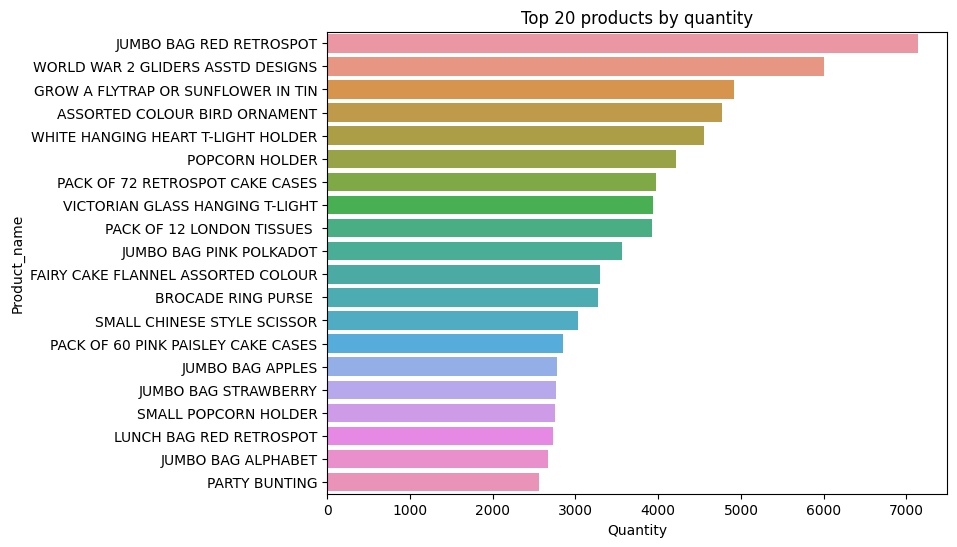

In [28]:
# Top 20 products by quantity
plt.figure(figsize=(8, 6))
sns.barplot(x=df_products['Quantity'], y=df_products['Product_name'])
plt.title('Top 20 products by quantity')
plt.show()

## Top 20 highest spending customers 

In [29]:
df_customers = data_uk_concat.groupby('CustomerID')['TotalAmount'].sum()
df_customers = pd.DataFrame(df_customers.sort_values(ascending=False)).iloc[:20, :]
df_customers = df_customers.reset_index()
df_customers

CustomerID  TotalAmount
0      18102.0     29443.60
1      16029.0     18336.92
2      17511.0     18091.90
3      15311.0     12725.74
4      13089.0     11970.22
5      14096.0     10089.79
6      15769.0      9677.40
7      13694.0      9084.80
8      15061.0      8973.70
9      16684.0      8483.82
10     14298.0      8405.88
11     13798.0      8363.32
12     14680.0      7597.71
13     17450.0      7520.76
14     13098.0      7231.91
15     17841.0      6706.13
16     15749.0      6539.40
17     13081.0      6111.55
18     12931.0      6025.90
19     16422.0      6005.21

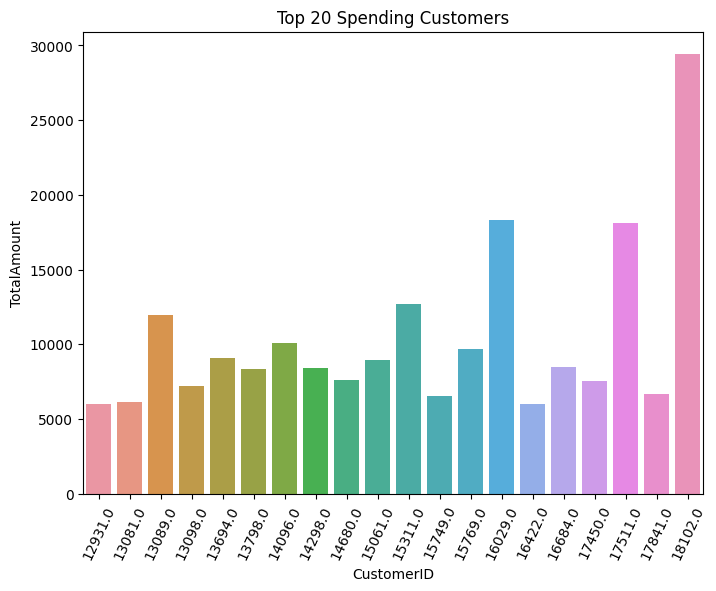

In [30]:
# Top 20 Spending Customers
plt.figure(figsize=(8, 6))
sns.barplot(x=df_customers['CustomerID'], y=df_customers['TotalAmount'])
plt.title('Top 20 Spending Customers')
plt.xticks(rotation=65)
plt.show()

In [31]:
# Top 20 most frequent customers 
df_frequency = data_uk_concat.groupby('CustomerID')['InvoiceNo'].unique()

nb_orders = []
for value in df_frequency.values:
    nb_orders.append(len(value))

indexes = df_frequency.index

df_frequency = pd.DataFrame(nb_orders, columns=['Frequency'])
df_frequency['CustomerID'] = indexes
df_frequency = df_frequency.sort_values('Frequency', ascending=False).iloc[:20, :]
df_frequency = df_frequency.reset_index()
df_frequency = df_frequency.drop('index', axis=1)
df_frequency

Frequency  CustomerID
0         147     12748.0
1         117     17841.0
2          87     15311.0
3          86     14606.0
4          63     13089.0
5          52     14527.0
6          47     12971.0
7          44     15039.0
8          40     13798.0
9          35     13408.0
10         33     16029.0
11         32     17811.0
12         32     12921.0
13         32     13263.0
14         31     15061.0
15         28     13468.0
16         28     17757.0
17         28     16422.0
18         28     14298.0
19         27     15005.0

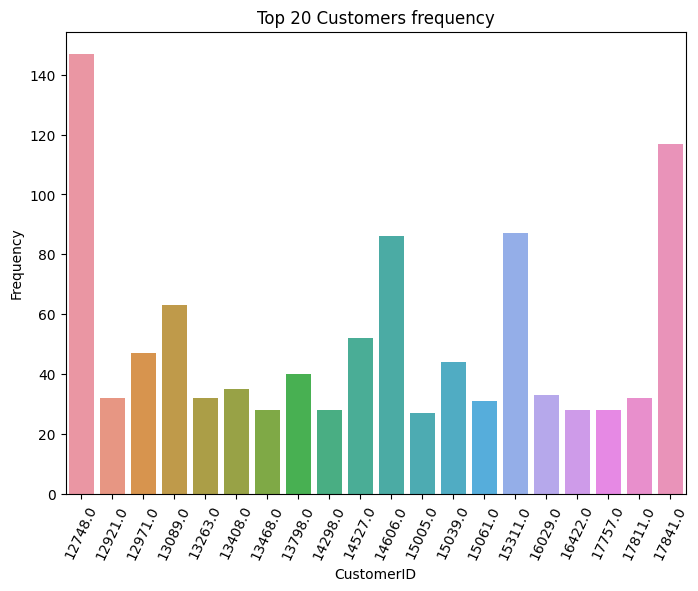

In [32]:
# Top 20 Customers frequency
plt.figure(figsize=(8,6))
sns.barplot(x=df_frequency['CustomerID'], y=df_frequency['Frequency'])
plt.title('Top 20 Customers frequency')
plt.xticks(rotation=65)
plt.show()

In [33]:
#Top 20 customers 
df_mean = data_uk_concat.groupby('CustomerID')['TotalAmount'].mean()
df_mean = pd.DataFrame(df_mean.sort_values(ascending=False)).iloc[:20, :]
df_mean = df_mean.reset_index()
df_mean['MeanAmountPerOrder'] = df_mean['TotalAmount']
df_mean = df_mean.drop('TotalAmount', axis=1)
df_mean

CustomerID  MeanAmountPerOrder
0      15749.0         6539.400000
1      16532.0         2232.000000
2      18102.0          841.245714
3      17949.0          827.751429
4      17857.0          795.000000
5      16308.0          640.000000
6      17723.0          518.750000
7      12931.0          463.530769
8      12980.0          458.124000
9      16333.0          424.462222
10     17388.0          381.600000
11     15769.0          372.207692
12     17029.0          358.000000
13     15100.0          350.400000
14     17450.0          341.852727
15     16029.0          333.398545
16     13750.0          325.440000
17     13848.0          320.000000
18     14145.0          297.000000
19     13452.0          295.000000

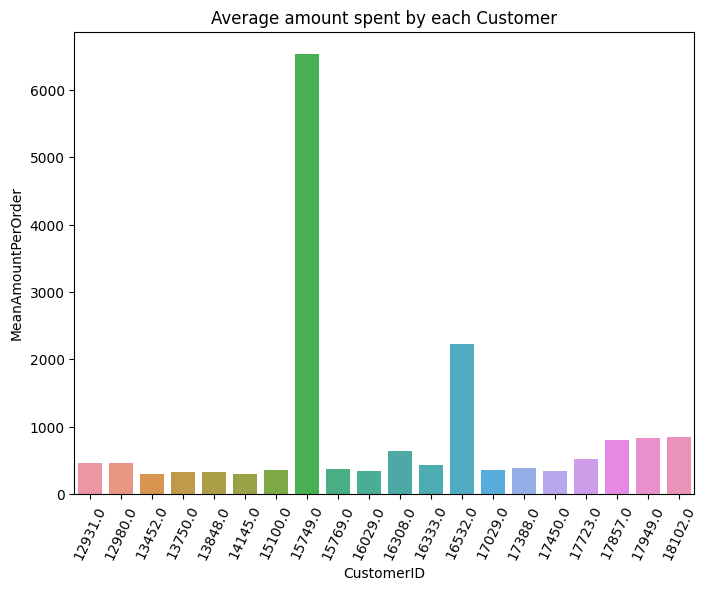

In [34]:
# Top 20 Customers frequency
plt.figure(figsize=(8,6))
sns.barplot(x=df_mean['CustomerID'], y=df_mean['MeanAmountPerOrder'])
plt.title('Average amount spent by each Customer')
plt.xticks(rotation=65)
plt.show()

In [35]:
# Periodicity of sales (sales per month)
df_sales_month = data_uk_concat.groupby('Month')['TotalAmount'].sum()
df_sales_month = pd.DataFrame(df_sales_month.sort_values(ascending=False)).iloc[:20, :]
df_sales_month = df_sales_month.reset_index()
df_sales_month

Month  TotalAmount
0      11    151477.39
1      10     98695.45
2       7     89374.51
3       8     81616.02
4       9     76484.25
5      12     71754.21
6       5     65871.27
7       6     63849.64
8       4     52789.29
9       3     44307.46
10      2     38625.74
11      1     23066.47

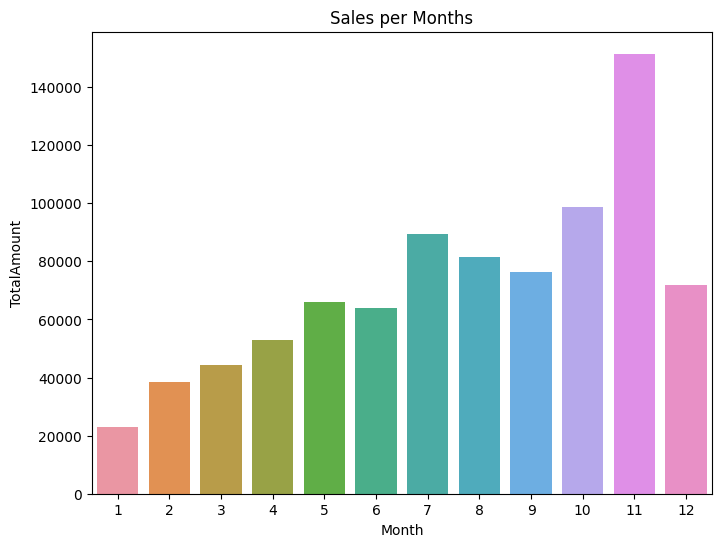

In [36]:
# Sales different months.
plt.figure(figsize=(8,6))
sns.barplot(x=df_sales_month['Month'], y=df_sales_month['TotalAmount'])
plt.title('Sales per Months')
plt.show()

The highest sales are made at the end of year (September, October, November, December)

In [37]:
#Sales per day 
df_sales_day = data_uk_concat.groupby('Day')['TotalAmount'].sum()
df_sales_day = pd.DataFrame(df_sales_day.sort_values(ascending=False)).iloc[:20, :]
df_sales_day = df_sales_day.reset_index()
df_sales_day

Day  TotalAmount
0     4     49960.68
1    11     42442.55
2     7     41898.75
3     5     35126.09
4    18     34843.95
5    20     33572.80
6     6     32705.11
7    24     31894.64
8     1     31335.75
9    10     31329.50
10   28     30984.39
11   14     29635.22
12    8     27769.07
13   22     27744.99
14   16     27606.92
15   21     27492.91
16   17     27257.89
17   25     26754.21
18    9     25874.24
19   23     25003.30

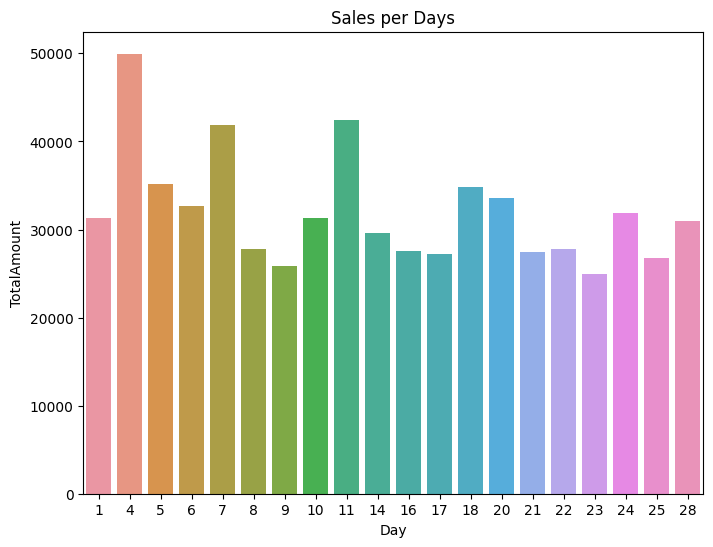

In [38]:
# Sales per day.
plt.figure(figsize=(8,6))
sns.barplot(x=df_sales_day['Day'], y=df_sales_day['TotalAmount'])
plt.title('Sales per Days')
plt.show()

Let's finish with the sales per moment of the day

In [39]:
data_uk_concat['Hour'].unique()

array([ 9, 11, 12, 13, 14, 15, 16,  8, 19, 10, 17, 18,  7, 20])

In [40]:
def subset_time(time):
  if (time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  
  elif (time==12 or time==13 or time==14 or time==15 or time==16):
    return 'Afternoon'
  
  else:
    return 'Evening'

In [41]:
data_uk_concat['TimeOfDay'] = data_uk_concat['Hour'].apply(subset_time)

In [42]:
df_time_day = data_uk_concat.groupby('TimeOfDay')['TotalAmount'].sum()
df_time_day = pd.DataFrame(df_time_day.sort_values(ascending=False))
df_time_day = df_time_day.reset_index()
df_time_day

TimeOfDay  TotalAmount
0  Afternoon    500502.87
1    Morning    324149.00
2    Evening     33259.83

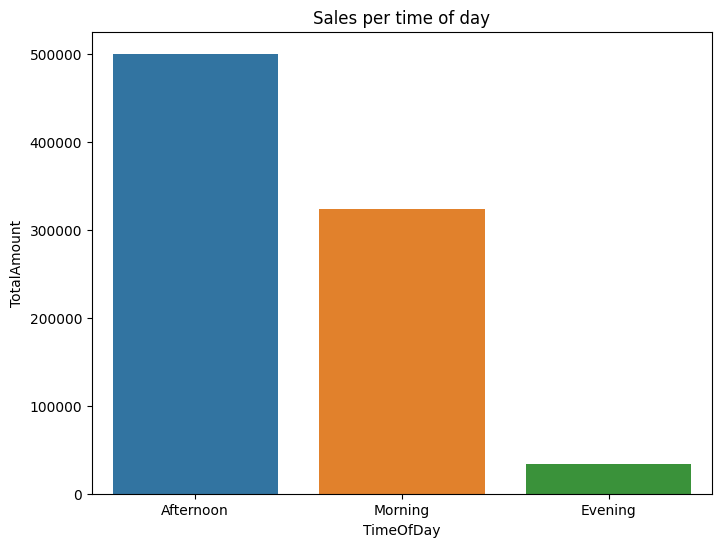

In [43]:
# Sales on different day-time types
plt.figure(figsize=(8,6))
sns.barplot(x=df_time_day['TimeOfDay'], y=df_time_day['TotalAmount'])
plt.title('Sales per time of day')
plt.show()

## Change in number of active customers month after month

In [44]:
def data_subset(data, beginning='2010-12-01', end='2011-12-09'):
    
    beginning = pd.to_datetime(beginning)
    end = pd.to_datetime(end)
    
    # Subsetting
    data = data[(data['InvoiceDate'] >= beginning) & (data['InvoiceDate'] <= end)]

    return data

In [45]:
data_uk_concat

CustomerID                         Description  Quantity  UnitPrice   
47         17850.0           HAND WARMER RED POLKA DOT         6       1.85  \
48         17850.0              HAND WARMER UNION JACK         6       1.85   
49         17850.0  WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
50         17850.0                 WHITE METAL LANTERN         6       3.39   
51         17850.0      CREAM CUPID HEARTS COAT HANGER         8       2.75   
...            ...                                 ...       ...        ...   
541883     15804.0         BOX OF 24 COCKTAIL PARASOLS        25       0.42   
541884     15804.0        ANTIQUE SILVER T-LIGHT GLASS        12       1.25   
541886     15804.0          MAGNETS PACK OF 4 SWALLOWS        12       0.39   
541891     13113.0    SET OF 3 HANGING OWLS OLLIE BEAK        24       1.25   
541892     13113.0       RED RETROSPOT ROUND CAKE TINS        24       8.95   

        TotalAmount InvoiceNo StockCode         InvoiceDate  Month  Day  Year   
47            11.10    536372     22632 2010-12-01 09:01:00     12    1  2010  \
48            11.10    536372     22633 2010-12-01 09:01:00     12    1  2010   
49            15.30    536373    85123A 2010-12-01 09:02:00     12    1  2010   
50            20.34    536373     71053 2010-12-01 09:02:00     12    1  2010   
51            22.00    536373    84406B 2010-12-01 09:02:00     12    1  2010   
...             ...       ...       ...                 ...    ...  ...   ...   
541883        10.50    581585     84692 2011-12-09 12:31:00     12    9  2011   
541884        15.00    581585     84946 2011-12-09 12:31:00     12    9  2011   
541886         4.68    581585     22398 2011-12-09 12:31:00     12    9  2011   
541891        30.00    581586     23275 2011-12-09 12:49:00     12    9  2011   
541892       214.80    581586     21217 2011-12-09 12:49:00     12    9  2011   

        Hour  TimeOfDay  
47         9    Morning  
48         9    Morning  
49         9    Morning  
50         9    Morning  
51         9    Morning  
...      ...        ...  
541883    12  Afternoon  
541884    12  Afternoon  
541886    12  Afternoon  
541891    12  Afternoon  
541892    12  Afternoon  

[41968 rows x 13 columns]

In [46]:
nb_customers = []
for i in range(0, 420, 30):
    new_data = data_subset(data_uk_concat, beginning=date(2010, 12, 1), end=date(2010, 12, 1) + timedelta(days=i))
    nb_customers.append(new_data['CustomerID'].nunique())
    
nb_customers

[0, 220, 386, 545, 701, 871, 1082, 1252, 1381, 1510, 1643, 1857, 2165, 2272]

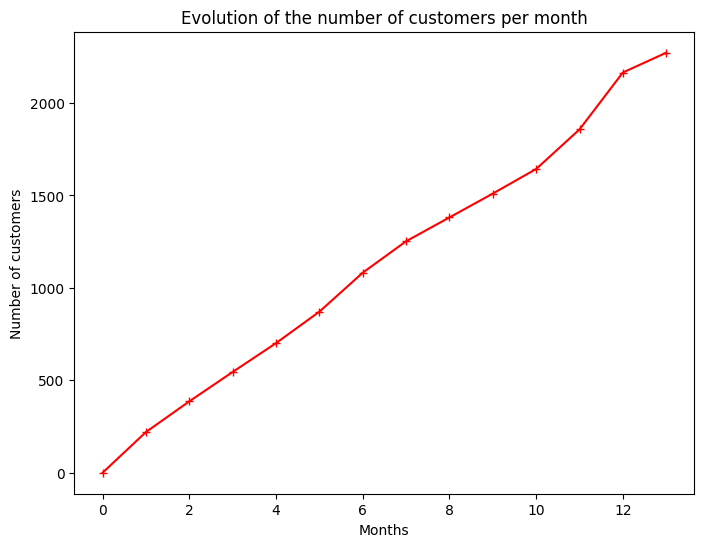

In [47]:
plt.figure(figsize=(8,6))
plt.plot(nb_customers, marker='+', color='r')
plt.title('Evolution of the number of customers per month')
plt.xlabel('Months')
plt.ylabel('Number of customers')
plt.show()